In [ ]:
import numpy as np
import pandas as pd

#For visualization
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib as mpl
import calplot as calplot
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/competitive-data-science-predict-future-sales/trains.csv')
shop_df = pd.read_csv('/content/drive/MyDrive/competitive-data-science-predict-future-sales/shops.csv')
test_df = pd.read_csv('/content/drive/MyDrive/competitive-data-science-predict-future-sales/tests.csv')
item_df = pd.read_csv('/content/drive/MyDrive/competitive-data-science-predict-future-sales/items.csv')
category_df = pd.read_csv('/content/drive/MyDrive/competitive-data-science-predict-future-sales/categories.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [ ]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


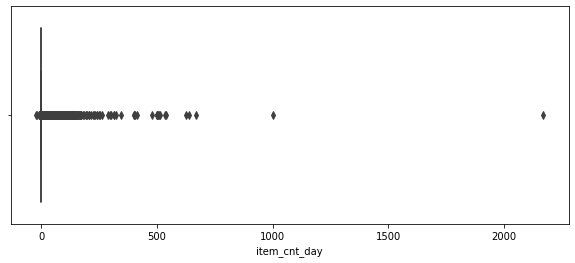

In [ ]:
plt.figure(figsize = (10,4))
sns.boxplot(x = train_df["item_cnt_day"]);

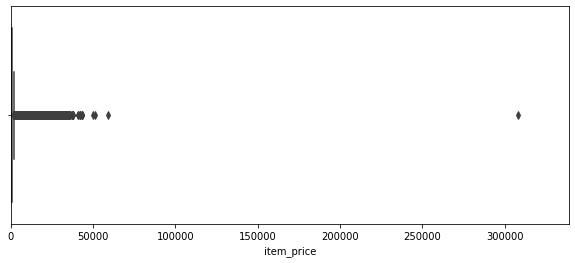

In [ ]:
# let's look at outliers for item price
plt.figure(figsize = (10,4))
plt.xlim(train_df["item_price"].min(), train_df["item_price"].max()*1.1)
sns.boxplot(x = train_df["item_price"]);

In [ ]:
# There are negative values on the table, checking for outliner
train_df[train_df.item_cnt_day > 900]


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [ ]:
train_df[train_df.item_price > 100000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,13.12.2013,11,12,6066,307980.0,1.0


In [ ]:

train_df[train_df.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [ ]:
train_df[train_df.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [ ]:
# 7,356 rows of item_cnt_day have negative values

In [ ]:
## Drop item_price and item_cnt_day too high
train_df = train_df[train_df.item_price<100000] # drop 1
train_df = train_df[train_df.item_cnt_day<1000] # drop 2

## Drop negative price 
train_df = train_df[train_df.item_price > 0].reset_index(drop=True) # drop 1

## The item has been returned 
train_df.loc[train_df.item_cnt_day < 0, 'item_cnt_day'] = 0

In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,0.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
train_df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935845e+06,2.935845e+06,2.935845e+06,2.935845e+06,2.935845e+06
mean,1.456991e+01,3.300175e+01,1.019723e+04,8.907495e+02,1.244131e+00
std,9.422984e+00,1.622697e+01,6.324297e+03,1.720491e+03,2.215525e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,5.920000e+04,6.690000e+02


In [ ]:
# To get a total sales, i multiplied item_price with item_cnt_day
train_df['total_sales'] = train_df.item_price * train_df.item_cnt_day



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935845 entries, 0 to 2935844
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
 6   total_sales     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 156.8+ MB


In [ ]:
# Date is using string format, we need to convert all our dates into numerical format
train_df['date'] = pd.to_datetime(train_df.date)



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935845 entries, 0 to 2935844
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   total_sales     float64       
 7   Month           int64         
 8   Year            int64         
 9   day_of_week     object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 224.0+ MB


In [ ]:
# Added a three new columns to the table, Month, Year, and day or the week.
train_df['Month'] = train_df['date'].dt.month
train_df['Year'] = train_df['date'].dt.year
train_df['day_of_week'] = train_df['date'].dt.day_name()

In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales,Month,Year,day_of_week
0,2013-02-01,0,59,22154,999.00,1.0,999.00,2,2013,Friday
1,2013-03-01,0,25,2552,899.00,1.0,899.00,3,2013,Friday
2,2013-05-01,0,25,2552,899.00,0.0,0.00,5,2013,Wednesday
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05,6,2013,Saturday
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,2013,Tuesday


In [ ]:
msrv_df = train_df.groupby('date_block_num')[['item_cnt_day','total_sales']].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(x=msrv_df.date_block_num, y=msrv_df.item_cnt_day,
                    mode='lines',
                    line= dict(color='green', width=2)))

fig.update_layout(title='Monthly Sales',
                   xaxis_title='Month',
                   yaxis_title='Total item sold')

fig.show()


fig = go.Figure()
fig.add_trace(go.Scatter(x=msrv_df.date_block_num, y=msrv_df.total_sales,
                    mode='lines',
                    line= dict(color='green', width=2)))

fig.update_layout(title='Monthly Revenue',
                   xaxis_title='Month',
                   yaxis_title='?')

fig.show()

In [ ]:
# To get the year that has the most selling of all 

years_item_cnt = train_df.groupby('Year')['item_cnt_day'].sum().reset_index()

trace1 = go.Bar(
    x=years_item_cnt.Year,
    y=years_item_cnt.item_cnt_day,
    textposition='outside',
    marker=dict(
        color='green'

    )
)

data=[trace1]

layout = go.Layout(
    title='Annual Sales',
    xaxis_type='category',
    xaxis=dict(
        title='Years'
    ),
    yaxis=dict(
        title='Total Item sold'
    )
)

figure = go.Figure(data=data, layout=layout)

figure.show()

In [ ]:
temp_df = train_df.groupby('day_of_week').sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=temp_df.index.values, y=temp_df.item_cnt_day,
                    mode='lines',
                    line= dict(color='green', width=2)))

fig.update_layout(title='Daily Sales',
                   xaxis_title='Days',
                   yaxis_title='Total item sold')

fig.show()

(<Figure size 1440x864 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f198f00dd68>,
       dtype=object))

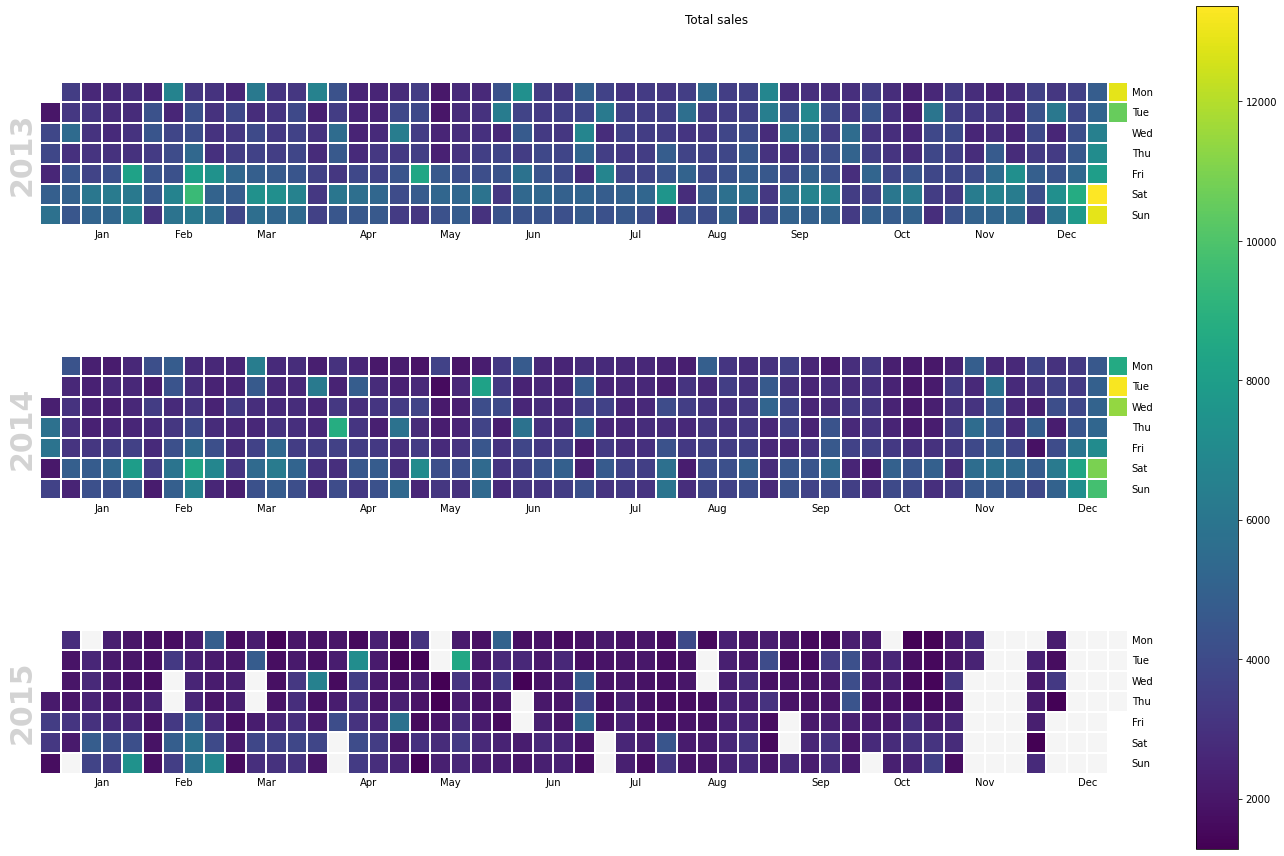

In [ ]:
# Using a calender plot to show daily sales over the week and year
calender = train_df[['date','item_cnt_day']]
calender.set_index('date', inplace = True)
calender  = calender.resample("D")["item_cnt_day"].sum()

calplot.calplot(calender,
               figsize=(20,12),
               suptitle= 'Total sales')

In [ ]:
# From this calplot above we see that 2015 recorded lowest sales compare to 2013 and 2014

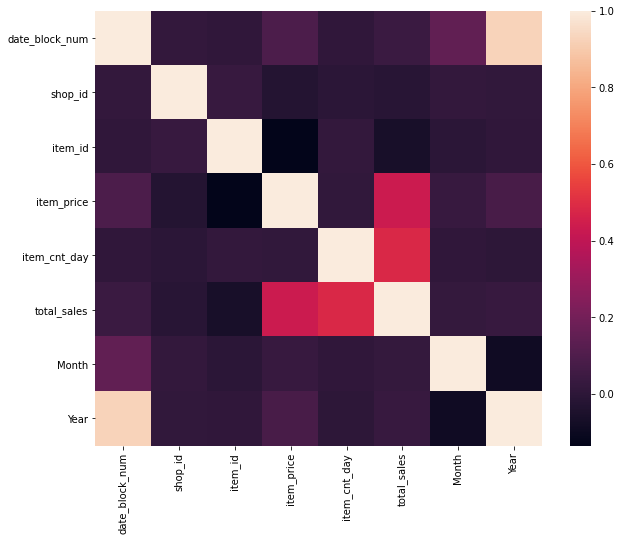

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(train_df.corr())

In [ ]:
# which shop is the highest and lowest revenue 
# which shop is the most popular and lowest 
# which item category is the most popular and the worst.............
# which item name is the most popular and the worst?
#

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935845 entries, 0 to 2935844
Data columns (total 10 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
 6   total_sales     float64       
 7   Month           int64         
 8   Year            int64         
 9   day_of_week     object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(1)
memory usage: 224.0+ MB


In [ ]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_sales,Month,Year,day_of_week
0,2013-02-01,0,59,22154,999.00,1.0,999.00,2,2013,Friday
1,2013-03-01,0,25,2552,899.00,1.0,899.00,3,2013,Friday
2,2013-05-01,0,25,2552,899.00,0.0,0.00,5,2013,Wednesday
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05,6,2013,Saturday
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,1,2013,Tuesday
